In [1]:
import numpy as np
import pandas as pd
import io
import requests
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import zscore
from sklearn.svm import SVR
import pickle
import os
import joblib
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from pandas.api.types import CategoricalDtype
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
%matplotlib inline

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_AUS.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,AUS,Australia,Yarrawonga,AUS0000101,9.00,-36.0094,145.9995,Hydro,NaN,NaN,...,2019.0,38.216111,44.224722,50.183889,46.035278,31.444722,37.317778,NaN,Australia Clean Energy Regulator,NaN
508,AUS,Australia,Yarwun,AUS0000173,154.00,-23.8306,151.1519,Gas,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,AUS,Australia,Yuendumu,AUS0000465,0.24,-22.2426,131.7931,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,5.216667,5.176944,5.341111,NaN,Australia Clean Energy Regulator,NaN
510,AUS,Australia,Yulara,AUS0000257,10.95,-25.2323,130.9912,Gas,NaN,NaN,...,2019.0,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056,NaN,Australia Clean Energy Regulator,NaN


In [6]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
507,AUS,Australia,Yarrawonga,AUS0000101,9.00,-36.0094,145.9995,Hydro,NaN,NaN,...,2019.0,38.216111,44.224722,50.183889,46.035278,31.444722,37.317778,NaN,Australia Clean Energy Regulator,NaN
508,AUS,Australia,Yarwun,AUS0000173,154.00,-23.8306,151.1519,Gas,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,AUS,Australia,Yuendumu,AUS0000465,0.24,-22.2426,131.7931,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,5.216667,5.176944,5.341111,NaN,Australia Clean Energy Regulator,NaN
510,AUS,Australia,Yulara,AUS0000257,10.95,-25.2323,130.9912,Gas,NaN,NaN,...,2019.0,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056,NaN,Australia Clean Energy Regulator,NaN
511,AUS,Australia,Yurralyi Maya (Karratha Seven Mile),AUS0000218,180.00,-20.7620,116.7420,Gas,NaN,NaN,...,2019.0,NaN,NaN,977.226944,945.557778,756.219167,597.411667,NaN,Australia Clean Energy Regulator,NaN


In [7]:
df.shape

(512, 27)

In [8]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   6
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                 512
other_fuel2                 512
other_fuel3                 512
commissioning_year          220
owner                        17
source                        0
url                           0
geolocation_source            0
wepp_id                     512
year_of_capacity_data         4
generation_gwh_2013         259
generation_gwh_2014         235
generation_gwh_2015         222
generation_gwh_2016         213
generation_gwh_2017         219
generation_gwh_2018         212
generation_gwh_2019         512
generation_data_source      200
estimated_generation_gwh    512
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   512 non-null    object 
 1   country_long              512 non-null    object 
 2   name                      512 non-null    object 
 3   gppd_idnr                 512 non-null    object 
 4   capacity_mw               506 non-null    float64
 5   latitude                  512 non-null    float64
 6   longitude                 512 non-null    float64
 7   primary_fuel              512 non-null    object 
 8   other_fuel1               0 non-null      float64
 9   other_fuel2               0 non-null      float64
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        292 non-null    float64
 12  owner                     495 non-null    object 
 13  source                    512 non-null    object 
 14  url       

In [10]:
df.drop(['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel1','other_fuel2'],axis=1,inplace=True)

In [11]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 6
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year        220
owner                      17
source                      0
url                         0
geolocation_source          0
year_of_capacity_data       4
generation_gwh_2013       259
generation_gwh_2014       235
generation_gwh_2015       222
generation_gwh_2016       213
generation_gwh_2017       219
generation_gwh_2018       212
generation_gwh_2019       512
generation_data_source    200
dtype: int64

In [12]:
df.drop(['gppd_idnr','owner','generation_data_source'],axis=1,inplace=True)

In [13]:
df.isnull().sum()

country                    0
country_long               0
name                       0
capacity_mw                6
latitude                   0
longitude                  0
primary_fuel               0
commissioning_year       220
source                     0
url                        0
geolocation_source         0
year_of_capacity_data      4
generation_gwh_2013      259
generation_gwh_2014      235
generation_gwh_2015      222
generation_gwh_2016      213
generation_gwh_2017      219
generation_gwh_2018      212
generation_gwh_2019      512
dtype: int64

In [14]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,506.000000,512.000000,512.000000,292.000000,508.0,253.000000,277.000000,290.000000,299.000000,293.000000,300.000000,0.0
mean,127.380881,-30.862719,138.913013,1997.931507,2019.0,778.488685,731.375603,719.475953,698.604391,729.227186,707.507905,NaN
std,291.227666,7.238762,12.820301,16.217659,0.0,2251.906541,2068.549403,2206.550948,2201.084181,2228.929378,2239.435401,NaN
min,0.010000,-42.888300,113.534000,1949.000000,2019.0,0.003333,0.005000,0.000000,0.001667,0.021944,0.005000,NaN
25%,3.225000,-36.323000,129.337475,1989.000000,2019.0,17.232778,17.976667,14.980417,14.313889,13.282222,14.430486,NaN
50%,30.000000,-32.948800,144.967400,2001.000000,2019.0,100.758889,107.352500,93.063333,92.104722,89.629600,82.502639,NaN
75%,110.750000,-25.513875,148.595875,2012.000000,2019.0,325.435278,357.544444,325.640278,306.663889,354.642778,318.735278,NaN
max,2640.000000,-12.188900,153.434100,2018.000000,2019.0,16593.380000,16099.330280,17090.680000,17914.930000,15944.580000,17186.143890,NaN


In [15]:
df['year_of_capacity_data'].nunique()

1

In [16]:
df['name'].nunique()

512

In [18]:
df.drop(['name','url'],axis=1,inplace=True)

In [19]:
df['geolocation_source'].unique()

array(['Australian Renewable Energy Mapping Infrastructure'], dtype=object)

In [20]:
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [21]:
df.drop('year_of_capacity_data',axis=1,inplace=True)

In [22]:
df.fillna(df.median()[0], inplace=True)

C:\Users\DIPESH\AppData\Local\Temp\ipykernel_7508\2680258014.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median()[0], inplace=True)


In [23]:
df.isnull().sum()

country                0
country_long           0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
generation_gwh_2019    0
dtype: int64

In [24]:
df['source'].nunique()

1

In [25]:
df['geolocation_source'].nunique()

1

In [26]:
df['country'].nunique()

1

In [27]:
df['country_long'].nunique()

1

In [29]:
df.drop(['country','country_long'],axis=1,inplace=True)



In [30]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          512 non-null    float64
 1   latitude             512 non-null    float64
 2   longitude            512 non-null    float64
 3   primary_fuel         512 non-null    object 
 4   commissioning_year   512 non-null    float64
 5   source               512 non-null    object 
 6   geolocation_source   512 non-null    object 
 7   generation_gwh_2013  512 non-null    float64
 8   generation_gwh_2014  512 non-null    float64
 9   generation_gwh_2015  512 non-null    float64
 10  generation_gwh_2016  512 non-null    float64
 11  generation_gwh_2017  512 non-null    float64
 12  generation_gwh_2018  512 non-null    float64
 13  generation_gwh_2019  512 non-null    float64
dtypes: float64(11), object(3)
memory usage: 56.1+ KB


<Axes: xlabel='primary_fuel', ylabel='count'>

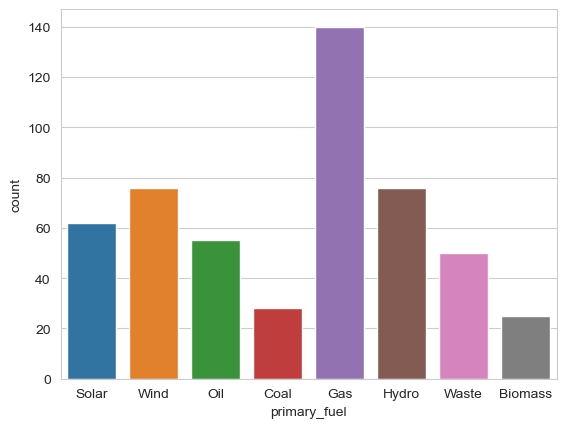

In [31]:
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data=df)

In [32]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,0.11,-34.9387,138.5377,Solar,2011.0,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
1,1.00,-34.9453,138.5882,Solar,30.0,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
2,21.60,-35.0641,117.7977,Wind,30.0,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,30.0
3,0.24,-23.7966,133.8971,Solar,2004.0,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
4,4.00,-34.5509,138.7659,Oil,2015.0,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0


In [33]:
dfcorr=df.corr()

C:\Users\DIPESH\AppData\Local\Temp\ipykernel_7508\3112470342.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfcorr=df.corr()


<Axes: >

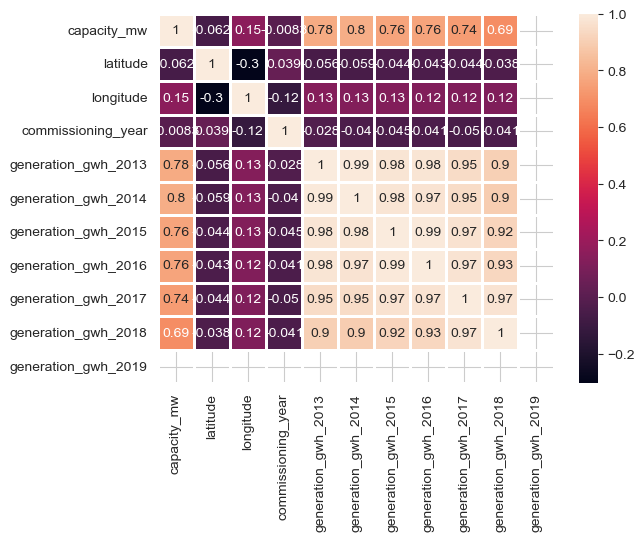

In [34]:
sns.heatmap(dfcorr,annot=True, linewidth=1)


<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2013'>

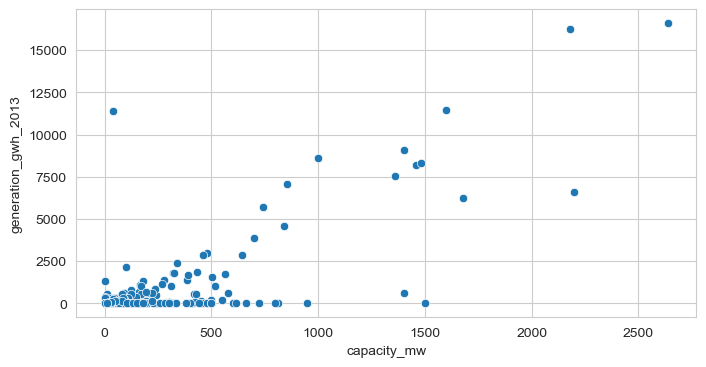

In [35]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2013',data=df)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2014'>

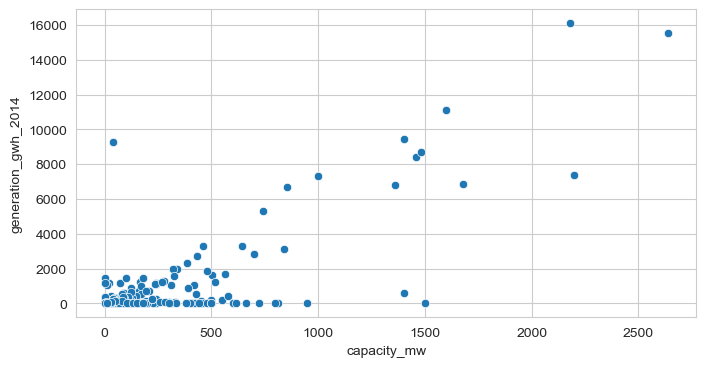

In [36]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2015'>

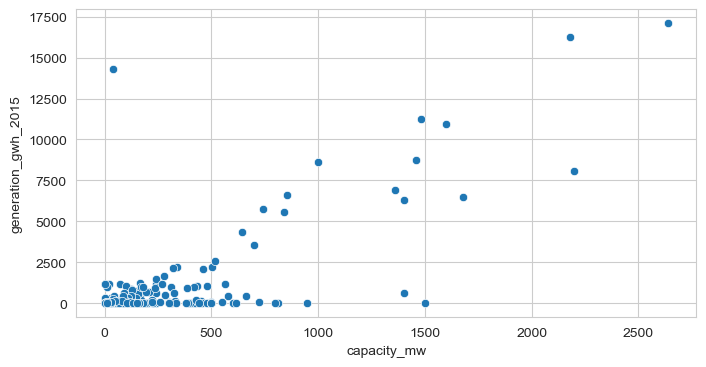

In [37]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=df)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2016'>

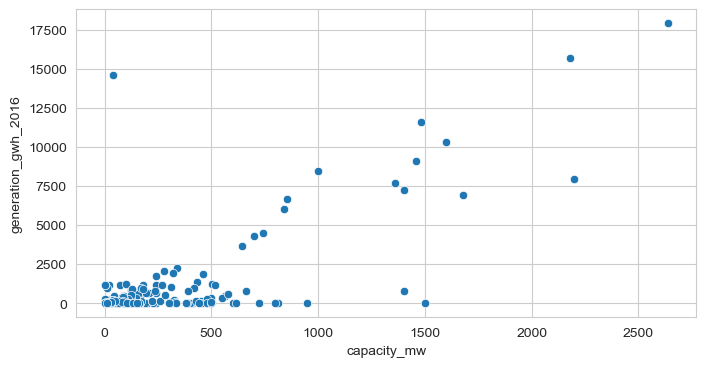

In [38]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=df)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2017'>

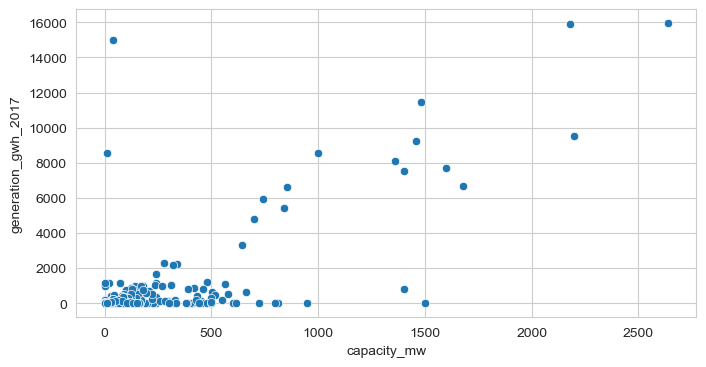

In [39]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=df)

<Axes: xlabel='capacity_mw', ylabel='latitude'>

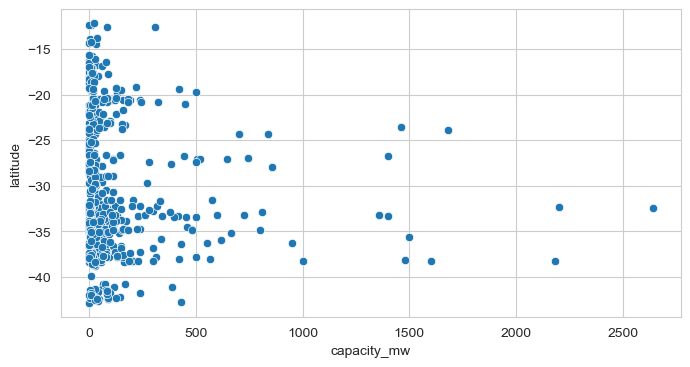

In [40]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='latitude',data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2013'>

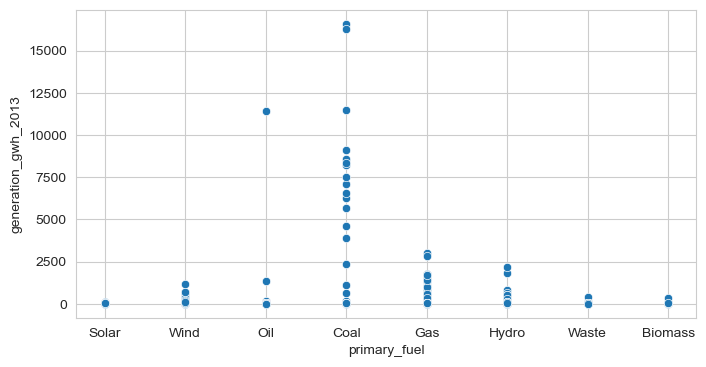

In [41]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2013',data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2014'>

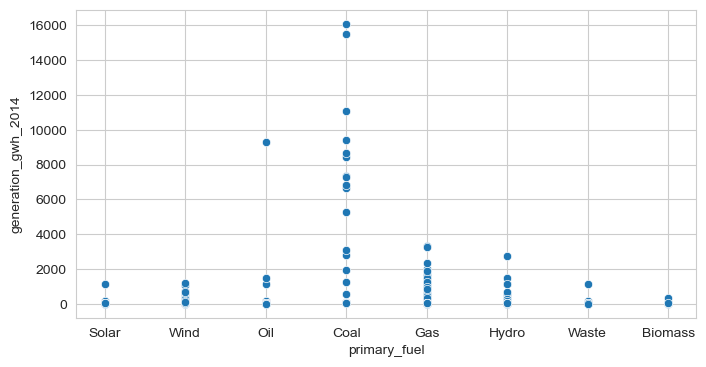

In [42]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=df)

C:\Users\DIPESH\AppData\Local\Temp\ipykernel_7508\2961916807.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i[1]],color='g')
C:\Users\DIPESH\AppData\Local\Temp\ipykernel_7508\2961916807.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i[1]],color='g')
C:\Users\DIPESH\AppData\Local\

ValueError: could not convert string to float: 'Solar'

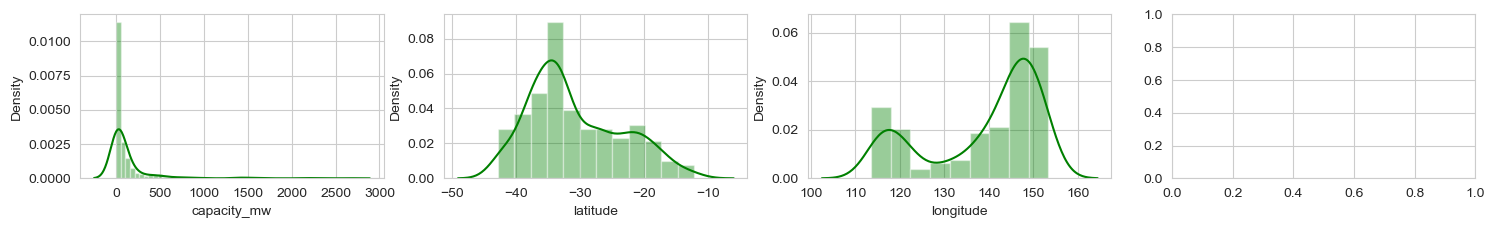

In [43]:
plt.figure(figsize=(18,20))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [44]:
df.skew()

C:\Users\DIPESH\AppData\Local\Temp\ipykernel_7508\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


capacity_mw            4.707334
latitude               0.572775
longitude             -0.823715
commissioning_year    -0.284432
generation_gwh_2013    6.655353
generation_gwh_2014    6.579729
generation_gwh_2015    6.713900
generation_gwh_2016    6.772263
generation_gwh_2017    6.353052
generation_gwh_2018    6.701004
generation_gwh_2019    0.000000
dtype: float64

In [45]:
df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]=power_transform(df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])
df.skew()

C:\Users\DIPESH\AppData\Local\Temp\ipykernel_7508\956266955.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


capacity_mw            0.013174
latitude               0.572775
longitude             -0.823715
commissioning_year    -0.284432
generation_gwh_2013   -0.092066
generation_gwh_2014   -0.049248
generation_gwh_2015   -0.040385
generation_gwh_2016   -0.034144
generation_gwh_2017   -0.034859
generation_gwh_2018    6.701004
generation_gwh_2019    0.000000
dtype: float64

In [46]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [47]:
x.shape

(512, 13)

In [48]:
y.shape

(512,)

In [49]:
sc=MinMaxScaler()
x=sc.fit_transform(x)
pd.DataFrame(x).isnull().sum()

ValueError: could not convert string to float: 'Solar'

In [50]:
pd.DataFrame(x).describe()

,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,512.000000,512.000000,512.000000,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,512.000000,512.0
mean,-30.862719,138.913013,1152.335938,-3.382711e-16,2.445960e-16,5.551115e-17,-1.439820e-16,4.649059e-16,426.977288,30.0
std,7.238762,12.820301,975.217565,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1745.289841,0.0
min,-42.888300,113.534000,30.000000,-3.258241e+00,-2.935341e+00,-2.665940e+00,-2.897843e+00,-2.869283e+00,0.005000,30.0
25%,-36.323000,129.337475,30.000000,-2.302907e-01,-2.617067e-01,-2.211101e-01,-2.285536e-01,-2.326005e-01,30.000000,30.0
50%,-32.948800,144.967400,1977.000000,-2.302907e-01,-2.617067e-01,-2.211101e-01,-2.285536e-01,-2.326005e-01,30.000000,30.0
75%,-25.513875,148.595875,2004.000000,5.249063e-01,6.390419e-01,5.987699e-01,6.201879e-01,6.276643e-01,133.531111,30.0
max,-12.188900,153.434100,2018.000000,2.689086e+00,2.635405e+00,2.702722e+00,2.646994e+00,2.602235e+00,17186.143890,30.0


In [51]:
pd.DataFrame(x).describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,512.0,-3.086272e+01,7.238762,-42.888300,-36.323000,-32.948800,-25.513875,-12.188900
longitude,512.0,1.389130e+02,12.820301,113.534000,129.337475,144.967400,148.595875,153.434100
commissioning_year,512.0,1.152336e+03,975.217565,30.000000,30.000000,1977.000000,2004.000000,2018.000000
generation_gwh_2013,512.0,-3.382711e-16,1.000978,-3.258241,-0.230291,-0.230291,0.524906,2.689086
generation_gwh_2014,512.0,2.445960e-16,1.000978,-2.935341,-0.261707,-0.261707,0.639042,2.635405
generation_gwh_2015,512.0,5.551115e-17,1.000978,-2.665940,-0.221110,-0.221110,0.598770,2.702722
generation_gwh_2016,512.0,-1.439820e-16,1.000978,-2.897843,-0.228554,-0.228554,0.620188,2.646994
generation_gwh_2017,512.0,4.649059e-16,1.000978,-2.869283,-0.232601,-0.232601,0.627664,2.602235
generation_gwh_2018,512.0,4.269773e+02,1745.289841,0.005000,30.000000,30.000000,133.531111,17186.143890
generation_gwh_2019,512.0,3.000000e+01,0.000000,30.000000,30.000000,30.000000,30.000000,30.000000


In [52]:
LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,LR_predict_test)}')
    print('\n')

ValueError: could not convert string to float: 'Coal'